In [ ]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive/MyDrive/AI

Mounted at /gdrive
/gdrive/MyDrive/AI


##kütüphane kurulumu

In [ ]:
!pip3 install -q keras

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import load_model
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import random

##verilerin internetten çekilmesi

In [ ]:
#veri setlerinin yüklenmesi
(x_train,y_train), (x_test,y_test)=fashion_mnist.load_data()# yler label yani cevap
print("x_train shape: ",x_train.shape)
print("y_train: ",y_train)

4431872/4422102 [==============================] - 0s 0us/step
x_train shape:  (60000, 28, 28)
y_train:  [9 0 0 ... 3 0 5]


##örnek veriler


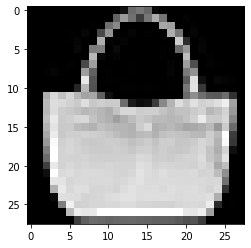

In [ ]:
plt.imshow(x_train[100],cmap="gray")

##10 sınıftan oluşan Fashion MNIST veri kümesinin sınıflarını isimlendiriyoruz

In [ ]:
# fashion mnist etiket isimleri
fashion_mnist_labels = np.array([
    'Tişört/Üst',
    'Pantolon',
    'Kazak',
    'Elbise',
    'Ceket',
    'Sandalet',
    'Gömlek',
    'Sneaker',
    'Çanta',
    'Bilekte Bot'])

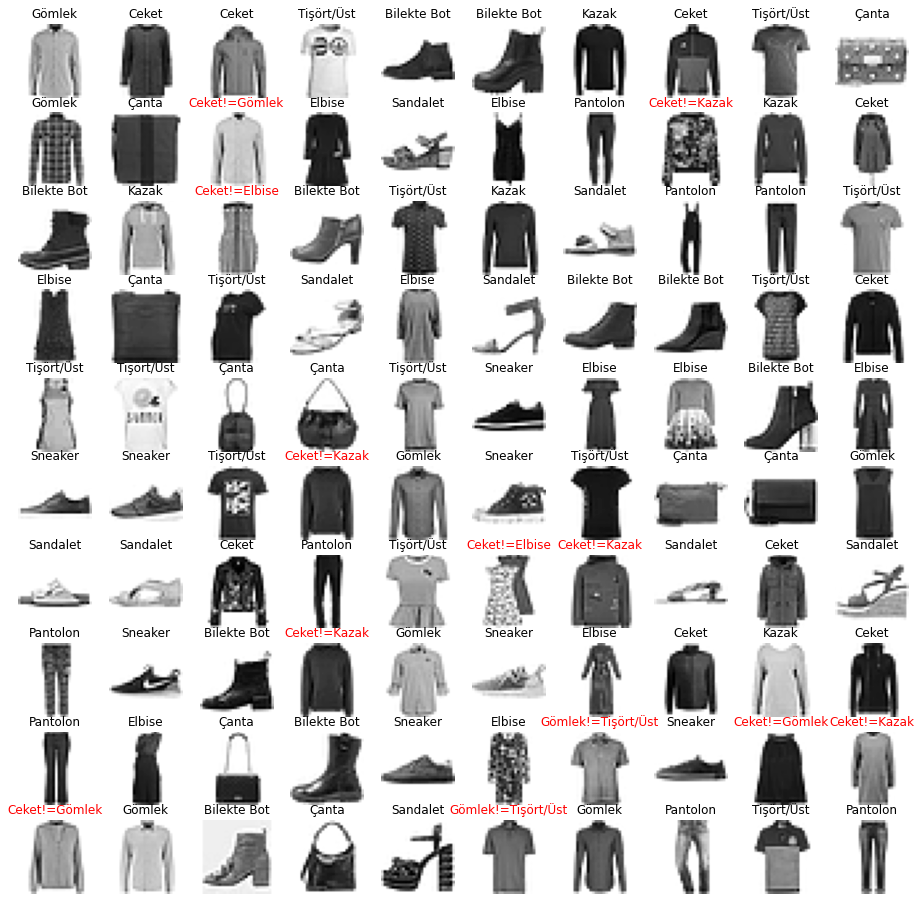

In [ ]:
root = '/gdrive/MyDrive/AI/'
model = load_model(root + 'model_fashion-mnist_cnn_train2_epoch24.h5')

    
def convertMnistData(image):
    img = image.astype('float32')
    img /= 255

    return image.reshape(1,28,28,1)

plt.figure(figsize=(16,16))

right = 0
mistake = 0
prefictionNum = 100

for i in range(prefictionNum):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertMnistData(image)

    plt.subplot(10, 10, i+1)
    plt.imshow(image,  cmap=cm.gray_r)
    plt.axis('off')

    ret = model.predict(data, batch_size=1) 
    #yazdır(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n

    if y_test[index] == bestclass:
        plt.title(fashion_mnist_labels[bestclass])
        right += 1
    else:
        #tahmin edilen sınıf != gerçek sınıf
        plt.title(fashion_mnist_labels[bestclass] + "!=" + fashion_mnist_labels[y_test[index]], color='#ff0000')
        mistake += 1
                                                                   
plt.show()

In [ ]:
print("Doğru tahminlerin sayısı:", right)
print("Hata sayısı:", mistake)
print("Doğru tahmin oranı:", right/(mistake + right)*100, '%')

Doğru tahminlerin sayısı: 88
Hata sayısı: 12
Doğru tahmin oranı: 88.0 %
